In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [17]:
space = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(space, space)

In [3]:
Z = np.sin(X) + np.cos(Y)

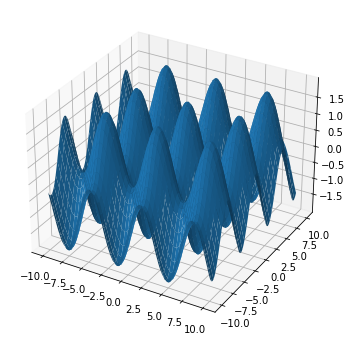

In [9]:
plt.figure(figsize=(10,6))
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

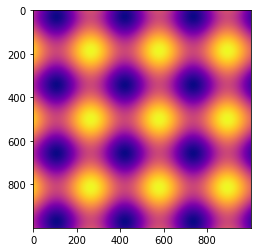

In [18]:
plt.imshow(Z, cmap="plasma")

### Poly
$$ 
\text{Poly}(z) = z^3 - 1 \{z \in \mathbb{C}\} 
$$

### Roots
$$
-\frac{1}{2} - \frac{\sqrt{3}i}{2}
$$

$$
1 + 0i
$$

$$
-\frac{1}{2} + \frac{\sqrt{3}i}{2}
$$

In [45]:
roots = [-0.5 - (3**.5)*1j/2, 1+0*1j, -.5+(3**.5)*1j/2]

def distance_from_roots(x):
    value = x**3 - 1
    dist1 = np.sqrt((x.real - roots[0].real)**2 + (x.imag - roots[0].imag)**2)
    dist2 = np.sqrt((x.real - roots[1].real)**2 + (x.imag - roots[1].imag)**2)
    dist3 = np.sqrt((x.real - roots[2].real)**2 + (x.imag - roots[2].imag)**2)
    if dist1 <= dist2 and dist1 <= dist3:
        return 0
    elif dist2 <= dist1 and dist2 <= dist3:
        return 1
    else:
        return 2
    
vecfunc = np.vectorize(distance_from_roots)
complex_plane = X+Y*1j
results = vecfunc(complex_plane)

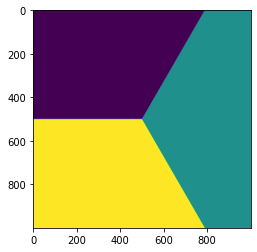

In [51]:
plt.imshow(results)

### Evaluating using the newton-raphson method
$$
\text{Poly}(x) = x^3 - 1 = P(x)
$$

$$
\frac{d}{dx}P(x) = 3x^2 = P'
$$

#### thinking about the newton-raphson method
$$
x - run = x_1
$$
where $x_1$ is closer to a root then $x$

so to find the run:
$$
P'(x) = \frac{\text{rise}}{\text{run}} = \frac{P(x)}{run}
$$

$$
run = \frac{P(x)}{P'(x)}
$$

$$
x_1 = x - run = x - \frac{P(x)}{P'(x)} 
$$

#### extrapolate that to n steps and we have

$$
x_{n+1} = x_n - \frac{P(x_n)}{P'(x_n)}
$$

In [56]:
roots = [-0.5 - (3**.5)*1j/2, 1+0*1j, -.5+(3**.5)*1j/2]

def distance_from_roots(x, steps=0):
    
    for _ in range(steps):
        x = x - (x**3 - 1)/(2*x**2)
    
    value = x**3 - 1 #Last calculation
    
    dist1 = np.sqrt((x.real - roots[0].real)**2 + (x.imag - roots[0].imag)**2)
    dist2 = np.sqrt((x.real - roots[1].real)**2 + (x.imag - roots[1].imag)**2)
    dist3 = np.sqrt((x.real - roots[2].real)**2 + (x.imag - roots[2].imag)**2)
    if dist1 <= dist2 and dist1 <= dist3:
        return 0
    elif dist2 <= dist1 and dist2 <= dist3:
        return 1
    else:
        return 2
    
vecfunc = np.vectorize(distance_from_roots)
complex_plane = X+Y*1j
results = vecfunc(complex_plane,10)

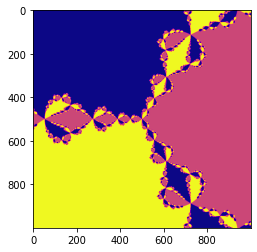

In [57]:
plt.imshow(results, cmap="plasma")